In [399]:
import pandas as pd

customers = pd.read_csv("/Users/tanmaie/Downloads/intern-bootcamp/data/raw/customers.csv")
order_items = pd.read_csv("/Users/tanmaie/Downloads/intern-bootcamp/data/raw/order_items.csv")
orders = pd.read_csv("/Users/tanmaie/Downloads/intern-bootcamp/data/raw/orders.csv")

In [400]:
orders.head()

,order_id,customer_id,order_date,status
0,1,92,2024-12-12,Pending
1,2,46,2024-12-31,Shipped
2,3,30,2025-10-10,Delivered
3,4,52,2024-10-20,Pending
4,5,37,2025-06-15,Cancelled


In [401]:
customers.head()

,customer_id,name,email,phone,city,country,created_at
0,1,Megan Beasley,crystalalexander@example.net,583-715-0680,New Patrickview,Guatemala,2024-08-27
1,2,Blake Lewis,judyvelazquez@example.net,687-737-9798x3540,Johnsonfort,Mayotte,2024-10-30
2,3,Brittany Salazar,lwheeler@example.com,261-409-8649x32390,Lake Sandra,Micronesia,2024-09-24
3,4,Ian White,qbentley@example.net,+1-614-683-4539,Meganchester,El Salvador,2024-02-06
4,5,Timothy Baird,lisa68@example.com,512.989.4055,Mcmillanland,Finland,2023-11-30


In [402]:
order_items.head()

,order_id,product_id,quantity,unit_price,total_price
0,1,31,1,353.08,353.08
1,1,31,2,353.08,706.16
2,1,44,2,402.07,804.14
3,1,25,3,423.75,1271.25
4,2,48,1,188.68,188.68


In [403]:
orders_customers = pd.merge(customers, orders, on='customer_id', how='left')

In [404]:
my_data = pd.merge(orders_customers, order_items, on = 'order_id', how = 'left')
my_data.isnull().sum()

customer_id    0
name           0
email          0
phone          0
city           0
country        0
created_at     0
order_id       8
order_date     8
status         8
product_id     8
quantity       8
unit_price     8
total_price    8
dtype: int64

In [405]:
my_data

,customer_id,name,email,phone,city,country,created_at,order_id,order_date,status,product_id,quantity,unit_price,total_price
0,1,Megan Beasley,crystalalexander@example.net,583-715-0680,New Patrickview,Guatemala,2024-08-27,192.0,2025-01-12,Delivered,16.0,3.0,294.72,884.16
1,2,Blake Lewis,judyvelazquez@example.net,687-737-9798x3540,Johnsonfort,Mayotte,2024-10-30,25.0,2025-07-19,Cancelled,21.0,2.0,468.84,937.68
2,2,Blake Lewis,judyvelazquez@example.net,687-737-9798x3540,Johnsonfort,Mayotte,2024-10-30,25.0,2025-07-19,Cancelled,48.0,3.0,188.68,566.04
3,2,Blake Lewis,judyvelazquez@example.net,687-737-9798x3540,Johnsonfort,Mayotte,2024-10-30,25.0,2025-07-19,Cancelled,37.0,1.0,223.96,223.96
4,2,Blake Lewis,judyvelazquez@example.net,687-737-9798x3540,Johnsonfort,Mayotte,2024-10-30,25.0,2025-07-19,Cancelled,6.0,3.0,115.47,346.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,100,Peter Pacheco,amysmith@example.org,408-595-8084x87649,Lake Victorville,Japan,2024-07-22,88.0,2024-12-02,Pending,42.0,3.0,59.07,177.21
615,100,Peter Pacheco,amysmith@example.org,408-595-8084x87649,Lake Victorville,Japan,2024-07-22,88.0,2024-12-02,Pending,2.0,3.0,201.22,603.66
616,100,Peter Pacheco,amysmith@example.org,408-595-8084x87649,Lake Victorville,Japan,2024-07-22,151.0,2025-07-25,Cancelled,47.0,3.0,310.87,932.61
617,100,Peter Pacheco,amysmith@example.org,408-595-8084x87649,Lake Victorville,Japan,2024-07-22,151.0,2025-07-25,Cancelled,22.0,3.0,34.08,102.24


In [406]:
my_data.dtypes

customer_id      int64
name            object
email           object
phone           object
city            object
country         object
created_at      object
order_id       float64
order_date      object
status          object
product_id     float64
quantity       float64
unit_price     float64
total_price    float64
dtype: object

In [407]:
my_data.columns

Index(['customer_id', 'name', 'email', 'phone', 'city', 'country',
       'created_at', 'order_id', 'order_date', 'status', 'product_id',
       'quantity', 'unit_price', 'total_price'],
      dtype='object')

In [408]:
order_counts = my_data.groupby('customer_id')['order_id'].nunique()
order_counts

customer_id
1      1
2      3
3      2
4      1
5      0
      ..
96     2
97     2
98     1
99     3
100    3
Name: order_id, Length: 100, dtype: int64

In [409]:
repeat_purchase = (order_counts >= 2).astype(int)
repeat_purchase.dtypes

dtype('int64')

In [410]:
my_data.dtypes

customer_id      int64
name            object
email           object
phone           object
city            object
country         object
created_at      object
order_id       float64
order_date      object
status          object
product_id     float64
quantity       float64
unit_price     float64
total_price    float64
dtype: object

In [411]:
my_data = my_data.merge(repeat_purchase, on='customer_id', how = 'left' )
my_data.dtypes

customer_id      int64
name            object
email           object
phone           object
city            object
country         object
created_at      object
order_id_x     float64
order_date      object
status          object
product_id     float64
quantity       float64
unit_price     float64
total_price    float64
order_id_y       int64
dtype: object

In [412]:
my_data = my_data.rename(columns={'order_id_y':'repeat'})
my_data = my_data.rename(columns={'order_id_x':'order_id'})
my_data

,customer_id,name,email,phone,city,country,created_at,order_id,order_date,status,product_id,quantity,unit_price,total_price,repeat
0,1,Megan Beasley,crystalalexander@example.net,583-715-0680,New Patrickview,Guatemala,2024-08-27,192.0,2025-01-12,Delivered,16.0,3.0,294.72,884.16,0
1,2,Blake Lewis,judyvelazquez@example.net,687-737-9798x3540,Johnsonfort,Mayotte,2024-10-30,25.0,2025-07-19,Cancelled,21.0,2.0,468.84,937.68,1
2,2,Blake Lewis,judyvelazquez@example.net,687-737-9798x3540,Johnsonfort,Mayotte,2024-10-30,25.0,2025-07-19,Cancelled,48.0,3.0,188.68,566.04,1
3,2,Blake Lewis,judyvelazquez@example.net,687-737-9798x3540,Johnsonfort,Mayotte,2024-10-30,25.0,2025-07-19,Cancelled,37.0,1.0,223.96,223.96,1
4,2,Blake Lewis,judyvelazquez@example.net,687-737-9798x3540,Johnsonfort,Mayotte,2024-10-30,25.0,2025-07-19,Cancelled,6.0,3.0,115.47,346.41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,100,Peter Pacheco,amysmith@example.org,408-595-8084x87649,Lake Victorville,Japan,2024-07-22,88.0,2024-12-02,Pending,42.0,3.0,59.07,177.21,1
615,100,Peter Pacheco,amysmith@example.org,408-595-8084x87649,Lake Victorville,Japan,2024-07-22,88.0,2024-12-02,Pending,2.0,3.0,201.22,603.66,1
616,100,Peter Pacheco,amysmith@example.org,408-595-8084x87649,Lake Victorville,Japan,2024-07-22,151.0,2025-07-25,Cancelled,47.0,3.0,310.87,932.61,1
617,100,Peter Pacheco,amysmith@example.org,408-595-8084x87649,Lake Victorville,Japan,2024-07-22,151.0,2025-07-25,Cancelled,22.0,3.0,34.08,102.24,1


In [413]:
my_data.dtypes[['total_price','quantity']]

total_price    float64
quantity       float64
dtype: object

In [414]:
#aggregate features to per customer 

features =(my_data.groupby('customer_id').agg(order_id = ('order_id', 'nunique'),
                                             total_spent_avg = ('total_price','mean'),
                                             total_quantity = ('quantity', 'sum') ,
                                             unique_prod = ('product_id', 'nunique')).fillna(0).reset_index())
features

,customer_id,order_id,total_spent_avg,total_quantity,unique_prod
0,1,1,884.160000,3.0,1
1,2,3,554.733636,24.0,10
2,3,2,693.841429,16.0,7
3,4,1,772.540000,2.0,1
4,5,0,0.000000,0.0,0
...,...,...,...,...,...
95,96,2,453.210000,14.0,8
96,97,2,322.112500,8.0,4
97,98,1,814.510000,5.0,2
98,99,3,662.427778,22.0,9


In [415]:
features.dtypes

customer_id          int64
order_id             int64
total_spent_avg    float64
total_quantity     float64
unique_prod          int64
dtype: object

In [416]:
my_data.dtypes

customer_id      int64
name            object
email           object
phone           object
city            object
country         object
created_at      object
order_id       float64
order_date      object
status          object
product_id     float64
quantity       float64
unit_price     float64
total_price    float64
repeat           int64
dtype: object

In [417]:
df = pd.DataFrame(data = my_data[['customer_id', 'repeat']].copy(), columns = ['customer_id', 'repeat']) 
df.drop_duplicates()


,customer_id,repeat
0,1,0
1,2,1
12,3,1
19,4,0
20,5,0
...,...,...
586,96,1
595,97,1
599,98,0
601,99,1


In [418]:
new_f = pd.merge( features,df, on='customer_id' , how='left' )
new_f.drop_duplicates()

,customer_id,order_id,total_spent_avg,total_quantity,unique_prod,repeat
0,1,1,884.160000,3.0,1,0
1,2,3,554.733636,24.0,10,1
12,3,2,693.841429,16.0,7,1
19,4,1,772.540000,2.0,1,0
20,5,0,0.000000,0.0,0,0
...,...,...,...,...,...,...
586,96,2,453.210000,14.0,8,1
595,97,2,322.112500,8.0,4,1
599,98,1,814.510000,5.0,2,0
601,99,3,662.427778,22.0,9,1


In [419]:
from sklearn.model_selection import train_test_split

X = new_f.drop(columns = ['customer_id', 'repeat','order_id'])
Y = new_f['repeat']

In [420]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state= 33)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=23, max_depth=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.967741935483871
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.98      0.98      0.98       150

    accuracy                           0.97       186
   macro avg       0.95      0.95      0.95       186
weighted avg       0.97      0.97      0.97       186



In [423]:
from sklearn.linear_model import LogisticRegression


model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)
y_pred_LR = model_LR.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))

0.9193548387096774
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        36
           1       0.95      0.95      0.95       150

    accuracy                           0.92       186
   macro avg       0.87      0.87      0.87       186
weighted avg       0.92      0.92      0.92       186



<function matplotlib.pyplot.show(close=None, block=None)>

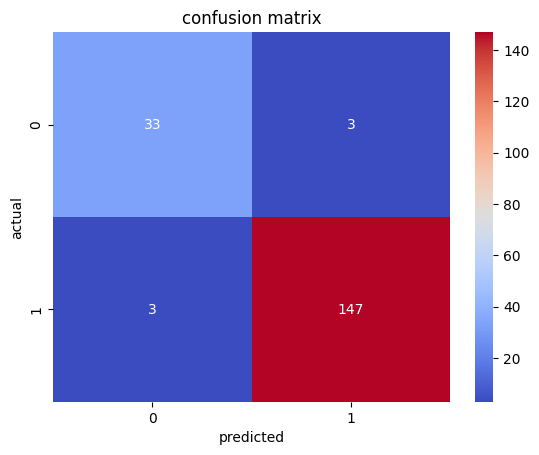

In [427]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show 
